In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [143]:
def get_edit_distance_matrix(df):
    # convert the edit_distance strings to a matrix for bar plotting
    nfrags = list(df["nfrags"])[0]
    edit_distance_matrix = []
    for row in df["edit_distances"]:
        # create the row of the matrx
        occurences_per_edit_distance = 8 * [0]
        
        # Skip rows that dont contain a string -> no merged reads
        if isinstance(row, str):
            for element in row.split():
                edit_dist, cnt = [int(x) for x in element.split(":")]
                percent = round(cnt/nfrags*100, 3)
                # edit distances bigger than the matrix will be put into the last row
                if edit_dist < 5:
                    occurences_per_edit_distance[int(edit_dist)] = percent
                elif edit_dist <= 10:
                    occurences_per_edit_distance[-1] += percent
                elif edit_dist <= 20:
                    occurences_per_edit_distance[-2] += percent
                else:
                    occurences_per_edit_distance[-3] += percent
                    
        edit_distance_matrix.append(occurences_per_edit_distance)
    return list(enumerate(zip(*edit_distance_matrix)))


def get_all_xticks(x, x_label, width):
    all_x = []
    all_x_label = []
    for x_pos, distname in zip(x, x_label):
        all_x += [
            x_pos-width*3, 
            x_pos-width*2, 
            x_pos-width, 
            x_pos, 
            x_pos+width, 
            x_pos+width*2, 
            x_pos+width*3
            ]
        all_x_label += [
            "0",
            "-5",
            "-10",
            f"-15\n{distname}", 
            "-20", 
            "-25",
            "-30"
            ]
    return all_x, all_x_label


def plot_edit_distance(program, df_program, outdir):
    fig, ax = plt.subplots(figsize=[12, 7])
                                    
    labels = [
        "prefectly reconstructed", 
        "edit distance: 1",
        "edit distance: 2",
        "edit distance: 3",
        "edit distance: 4",
        "edit distance: 5-10",
        "edit distance: 11-20",
        "edit distance: >20",
        "not merged",
        ]
    colors = [
        "#fcffa4",
        "#fac228",
        "#f57d15",
        "#d44842",
        "#9f2a63",
        "#65156e",
        "#280b53",
        "#000004",
        "tab:grey",
        ]

    x_label = df_program["fraglen_distribution"].unique()
    x = np.arange(len(x_label))  # the label locations
    width = 0.12
    shift = {
        "0": -width*3, 
        "-5": -width*2, 
        "-10": -width, 
        "-15": 0, 
        "-20": width,
        "-25": width*2,
        "-30": width*3,
        }

    # Plot bars for each quality shift after another
    for qs in list(df_program["quality_shift"].unique()):
        # Only take data for one quality shift 
        df_qs = df_program[df_program["quality_shift"] == qs]
        qs = str(qs)
        
        # Values to plot
        edit_distances = get_edit_distance_matrix(df_qs)
        dropped_percent = df_qs["dropped_reads"] / df_qs["nfrags"] * 100
        
        # Plot divergent and perfectly reconstructed reads
        bottom = len(dropped_percent) * [0] # y axis start for each bar
        for i, percent in list(reversed(edit_distances)):
            ax.bar(
                x + shift[qs],
                percent, 
                width, 
                bottom=bottom, 
                label=labels[i], 
                color=colors[i]
                )
            bottom = [sum(x) for x in zip(bottom, percent)]
        # Plot unmerge reads
        ax.bar(
            x + shift[qs], 
            dropped_percent, 
            width, 
            bottom=bottom,
            label=labels[-1],
            color=colors[-1]
            )
        bottom += [sum(x) for x in zip(bottom, dropped_percent)]


    # Set y axis limit
    ax.set_ylim(0, max(bottom))
    ax.set_yticks(range(0,101,10))
    # Add grid
    ax.grid(axis="y", alpha=0.3)
    # Add labels, title
    ax.set_xticks(*get_all_xticks(x, x_label, width))


    ax.set_ylabel('Percentage')
    ax.set_title(f"{program}, merged reads")
    # Add legend and change order
    handles, labels = plt.gca().get_legend_handles_labels()
    order = list(reversed(range(len(edit_distances)+1)))
    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
                loc='center left', bbox_to_anchor=(1, 0.5))

    fig.tight_layout()
    plt.show()
    # plt.savefig(f"{outdir}/edit_distances_{program}.png", 
    #             dpi='figure', 
    #             format="png")

In [29]:
def get_edit_distance_matrix(df):
    # convert the edit_distance strings to a matrix for bar plotting
    nfrags = list(df["nfrags"])[0]
    edit_distance_matrix = []
    for row in df["edit_distances"]:
        # create the row of the matrx
        occurences_per_edit_distance = 8 * [0]
        
        # Skip rows that dont contain a string -> no merged reads
        if isinstance(row, str):
            for element in row.split():
                edit_dist, cnt = [int(x) for x in element.split(":")]
                percent = round(cnt/nfrags*100, 3)
                # edit distances bigger than the matrix will be put into the last row
                if edit_dist < 5:
                    occurences_per_edit_distance[int(edit_dist)] = percent
                elif edit_dist <= 10:
                    occurences_per_edit_distance[-1] += percent
                elif edit_dist <= 20:
                    occurences_per_edit_distance[-2] += percent
                else:
                    occurences_per_edit_distance[-3] += percent
                    
        edit_distance_matrix.append(occurences_per_edit_distance)
    return list(enumerate(zip(*edit_distance_matrix)))


def plot_edit_distance(program, df_program, outdir):
                                    
    fig, axes = plt.subplots(1, 4, figsize=[15, 7]) #, gridspec_kw={'width_ratios': [0.98, 0.02]})
    distnames = list(df_program["fraglen_distribution"].unique())
    for ax, distname in zip(axes, distnames):
        
        # get data
        df_dist = df_program[df_program["fraglen_distribution"] == distname]
        quality_shift = df_dist["quality_shift"]
        edit_distances = get_edit_distance_matrix(df_dist)
        dropped_percent = df_dist["dropped_reads"] / df_dist["nfrags"] * 100
        
        labels = [
            "prefectly reconstructed", 
            "edit distance: 1",
            "edit distance: 2",
            "edit distance: 3",
            "edit distance: 4",
            "edit distance: 5-10",
            "edit distance: 11-20",
            "edit distance: >20",
            "not merged",
            ]
        colors = [
            "#fcffa4",
            "#fac228",
            "#f57d15",
            "#d44842",
            "#9f2a63",
            "#65156e",
            "#280b53",
            "#000004",
            "tab:grey",
            ]
        width = 1
        
        bottom = len(df_dist) * [0]
        # Plot divergent and perfectly reconstructed reads
        for i, percent in list(reversed(edit_distances)):
            ax.bar(quality_shift, percent, width, bottom=bottom, 
                   label=labels[i], color=colors[i])
            bottom = [sum(x) for x in zip(bottom, percent)]
        # Plot unmerge reads
        ax.bar(quality_shift, dropped_percent, width, bottom=bottom,
               label=labels[-1], color=colors[-1])
        bottom += [sum(x) for x in zip(bottom, dropped_percent)]
        

        # Set y axis limit
        ax.set_ylim(0, max(bottom))
        ax.set_yticks(range(0,101,10))
        # Add grid
        ax.grid(axis="y", alpha=0.3)
        # Add title and label
        ax.set_title(f"{distname}")
        ax.set_xlabel('quality shift')
        ax.invert_xaxis()

    plt.suptitle(f"{program}, merged reads")
    axes[0].set_ylabel('Percentage of simulated fragments')
    # Add legend and change order
    handles, labels = plt.gca().get_legend_handles_labels()
    order = list(reversed(range(len(edit_distances)+1)))
    axes[-1].legend([handles[idx] for idx in order], 
                    [labels[idx] for idx in order],
                    loc='center left', 
                    bbox_to_anchor=(1, 0.5))

    fig.tight_layout()
    plt.show()
    # plt.savefig(f"{outdir}/edit_distances_{program}.png", 
    #             dpi='figure', 
    #             format="png")

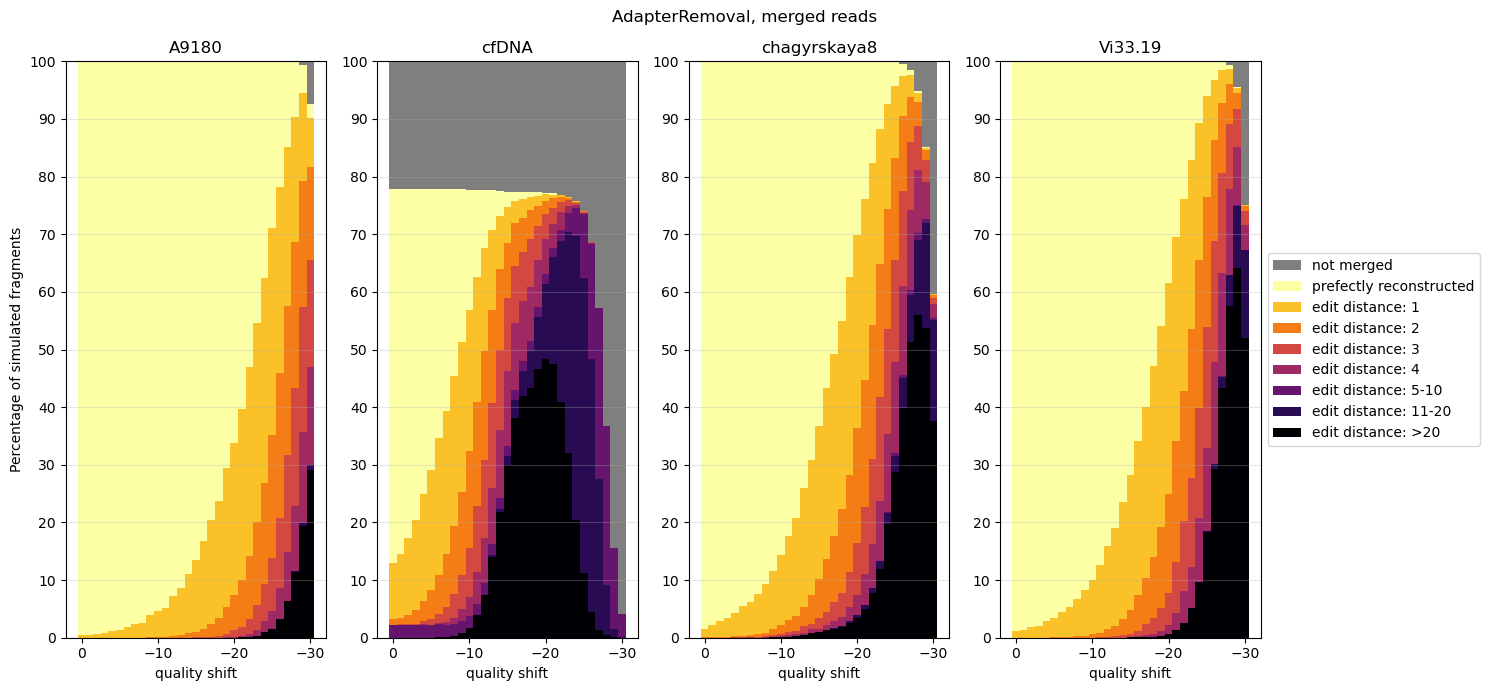

In [30]:
infile = "/mnt/c/Users/s202633/Documents/Master thesis/DNA_reconstruct/fraglen_distributions/output/evaluation/all_merged.csv"
df = pd.read_csv(infile)

for program in list(df["program"].unique()):
    # Only take data for one program 
    df_program = df[df["program"] == program]
    plot_edit_distance(program, df_program, outdir=None)
    break